# Quick Initial Analysis (Temporary, will be deleted)

In [1]:
import os
import sys
from pathlib import Path

root = Path(os.getcwd()).parent
os.chdir(root)
sys.path.append(str(root))

import pandas as pd

df = pd.read_excel('data/morphology_data.xlsx', sheet_name='morphology_EQ_Geneva')
df.head()

id        left          top       right       bottom  row_index  col_index  \
0  36  2497723.99  1118389.101  2497973.99  1118139.101         10          1   
1  37  2497723.99  1118139.101  2497973.99  1117889.101         11          1   
2  38  2497723.99  1117889.101  2497973.99  1117639.101         12          1   
3  39  2497723.99  1117639.101  2497973.99  1117389.101         13          1   
4  40  2497723.99  1117389.101  2497973.99  1117139.101         14          1   

   field_1       PC1       PC2  ...  noiseday_m  noisenight        bin_lst_me  \
0     1343  0.526055  0.338480  ...   -1.409763   -1.450883  (-0.699,-0.0567]   
1     1344  0.851423  0.674067  ...   -0.495672   -0.757194     (-2.4,-0.699]   
2     1345 -0.752449  0.148228  ...    0.247978    0.128687  (-0.699,-0.0567]   
3     1346  1.066390 -0.858294  ...   -0.072170   -0.152906     (-2.4,-0.699]   
4     1347 -0.433673 -0.642512  ...    0.762563    0.617922      (0.716,2.72]   

        bin_solar_      bin_sola_1       bin_pm10_m       bin_pm25_m  \
0     (0.658,2.84]     (0.529,3.4]   (-2.17,-0.717]   (-1.73,-0.731]   
1     (0.658,2.84]     (0.529,3.4]   (-2.17,-0.717]   (-1.73,-0.731]   
2  (-0.0457,0.658]   (-0.31,0.529]  (-0.717,-0.162]  (-0.731,-0.152]   
3   (-2.51,-0.611]  (-1.71,-0.722]   (-2.17,-0.717]  (-0.731,-0.152]   
4     (0.658,2.84]     (0.529,3.4]  (-0.717,-0.162]  (-0.731,-0.152]   

        bin_no2_me       bin_noised     bin_noisen  
0    (-2.33,-0.72]    (-2.7,-0.657]  (-2.55,-0.65]  
1    (-2.33,-0.72]  (-0.657,0.0621]  (-2.55,-0.65]  
2  (-0.72,-0.0796]   (0.0621,0.737]  (0.106,0.611]  
3    (-2.33,-0.72]  (-0.657,0.0621]  (-0.65,0.106]  
4    (-2.33,-0.72]     (0.737,2.34]   (0.611,2.66]  

[5 rows x 34 columns]

In [2]:
print(df.columns.unique())

Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'field_1', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'city',
       'z_distance', 'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint',
       'pm10_mean', 'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight',
       'bin_lst_me', 'bin_solar_', 'bin_sola_1', 'bin_pm10_m', 'bin_pm25_m',
       'bin_no2_me', 'bin_noised', 'bin_noisen'],
      dtype='object')


In [3]:
# Print the columns with unique values == len(df)

cols_to_remove = []
for col in df.columns:
    if col == 'id':
        continue
    if df[col].nunique() == len(df) or df[col].nunique() <= 1:
        cols_to_remove.append(col)

print("Columns to remove: ", cols_to_remove)
df = df.drop(columns=cols_to_remove)

Columns to remove:  ['field_1', 'city']


In [4]:
# Remove the columns with the "bin" prefix, as they are binned versions of other columns
bin_columns = [col for col in df.columns if col.startswith('bin')]
df = df.drop(columns=bin_columns)
print(f"Numbers of columns remaining this step: {len(df.columns)}")
print(df.columns)

Numbers of columns remaining this step: 24
Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'z_distance',
       'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint', 'pm10_mean',
       'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight'],
      dtype='object')


In [5]:
# Print the rows where there are NaN values
nan_rows = df[df.isna().any(axis=1)]
nan_rows
df.dropna(inplace=True)
print(f"Numbers of rows after dropping NaN values: {len(df)}")

Numbers of rows after dropping NaN values: 240


In [6]:
# Save the cleaned dataframe
df.to_csv('data/morphology_data_cleaned.csv', index=False)

Compact **Exploratory Data Analysis (EDA)** of the cleaned morphological dataset regarding Geneva neighborhoods. Here we perform sanity checks, look at distributions, correlations,  structure of higher dimensional data PCA-derived, clustering tendencies as well as relationships between environmental quality and morphology-associated markers.

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 240
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          240 non-null    int64  
 1   left        240 non-null    float64
 2   top         240 non-null    float64
 3   right       240 non-null    float64
 4   bottom      240 non-null    float64
 5   row_index   240 non-null    int64  
 6   col_index   240 non-null    int64  
 7   PC1         240 non-null    float64
 8   PC2         240 non-null    float64
 9   PC3         240 non-null    float64
 10  PC4         240 non-null    float64
 11  PC5         240 non-null    float64
 12  PC6         240 non-null    float64
 13  typology    240 non-null    object 
 14  z_distance  240 non-null    float64
 15  q_cluster   240 non-null    object 
 16  lst_mean    240 non-null    float64
 17  solar_summ  240 non-null    float64
 18  solar_wint  240 non-null    float64
 19  pm10_mean   240 non-null    float6

<Figure size 1200x800 with 0 Axes>

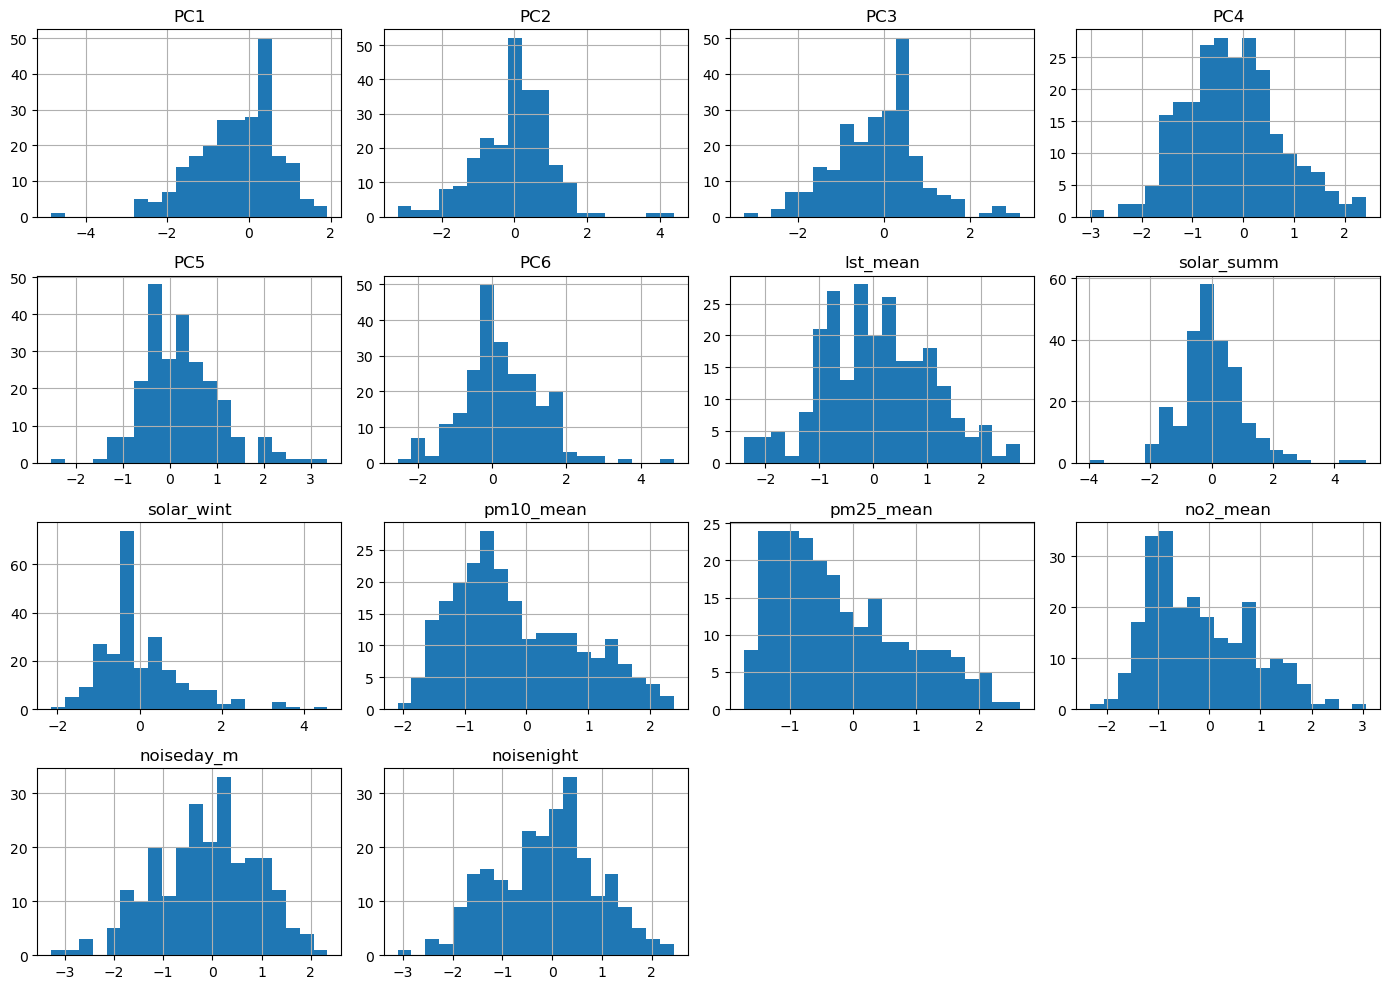

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# basic checks
df.info()
df.describe().T
df.isna().sum()


#compact overview using histograms and Kernel Density Estimations (KDE)


morph_cols=[c for c in df.columns if c.startswith("PC")]
env_cols=["lst_mean", "solar_summ", "solar_wint",
            "pm10_mean", "pm25_mean", "no2_mean",
            "noiseday_m", "noisenight"]

plt.figure(figsize=(12,8))
df[morph_cols + env_cols].hist(bins=20,figsize=(14,10))
plt.tight_layout()
plt.show()


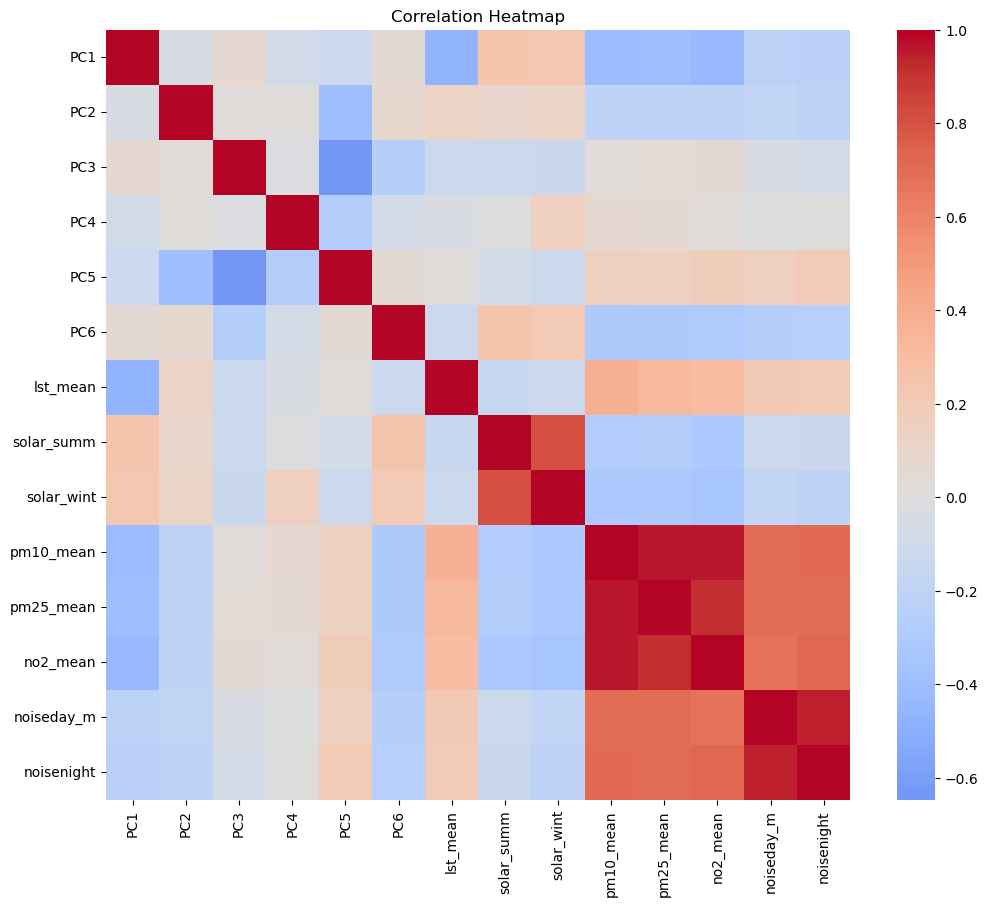

In [8]:
# correlation matrix, correlation between PCs serves as check for 
# proper PCA execution and meaningfulness


plt.figure(figsize=(12,10))
sns.heatmap(df[morph_cols + env_cols].corr(),
            annot=False, cmap="coolwarm",center=0)
plt.title("Correlation Heatmap")
plt.show()

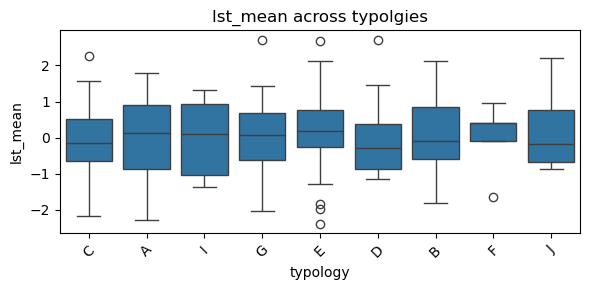

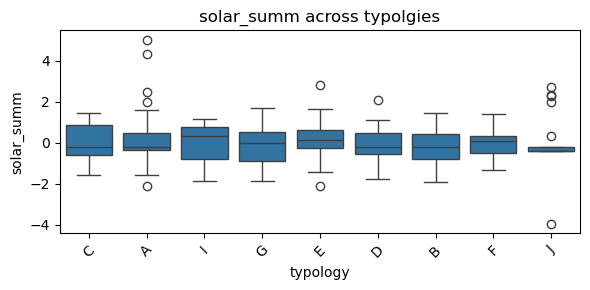

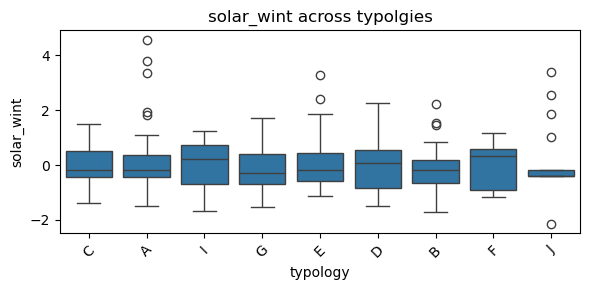

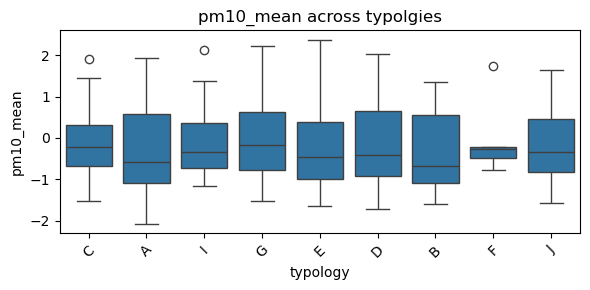

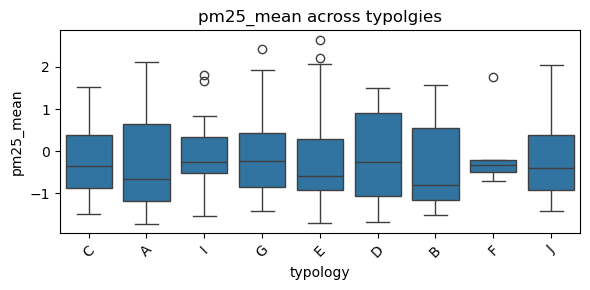

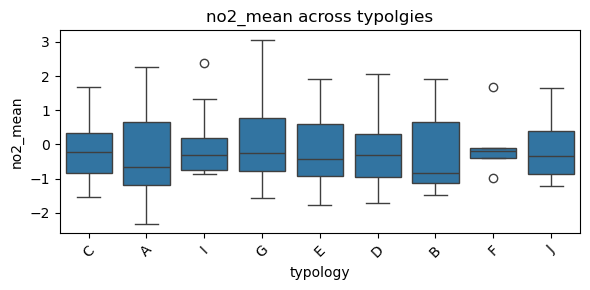

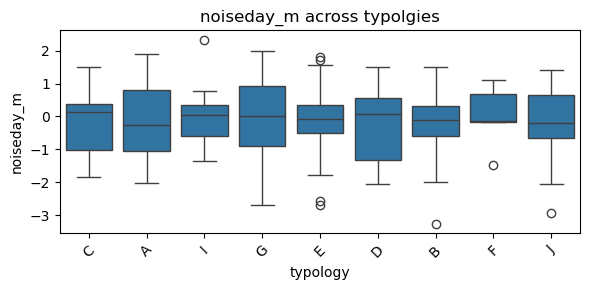

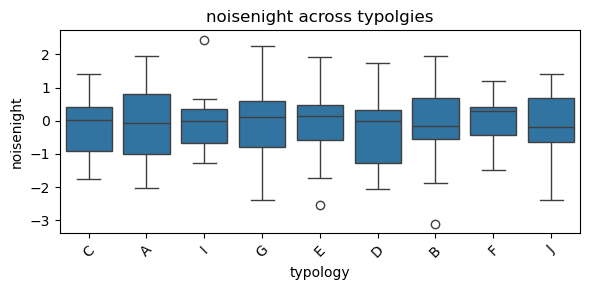

In [9]:
# Typology effects (categories derived from morphological PC-based clustering, 
# raw data we have no access to). Do different typologies have different exposure?

for var in env_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df,x='typology',y=var)
    plt.xticks(rotation=45)
    plt.title(f"{var} across typolgies")
    plt.tight_layout()
    plt.show()


In [10]:
# PCA structure check - correlations should be close to zero
df[morph_cols].corr()

PC1       PC2       PC3       PC4       PC5       PC6
PC1  1.000000 -0.048286  0.066929 -0.090662 -0.129159  0.052013
PC2 -0.048286  1.000000  0.026513  0.016082 -0.394689  0.076820
PC3  0.066929  0.026513  1.000000 -0.019652 -0.646967 -0.256911
PC4 -0.090662  0.016082 -0.019652  1.000000 -0.274261 -0.070849
PC5 -0.129159 -0.394689 -0.646967 -0.274261  1.000000  0.049985
PC6  0.052013  0.076820 -0.256911 -0.070849  0.049985  1.000000

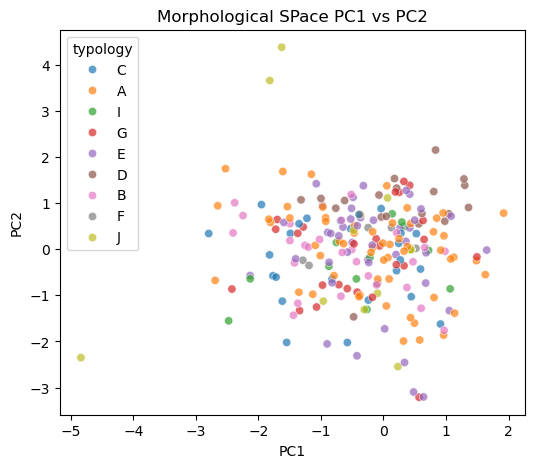

In [11]:
# Quick exploration of 2D morphology space
# only for 1 and 2 here
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x="PC1",y="PC2",hue="typology",alpha=0.7)
plt.title("Morphological SPace PC1 vs PC2")
plt.show()


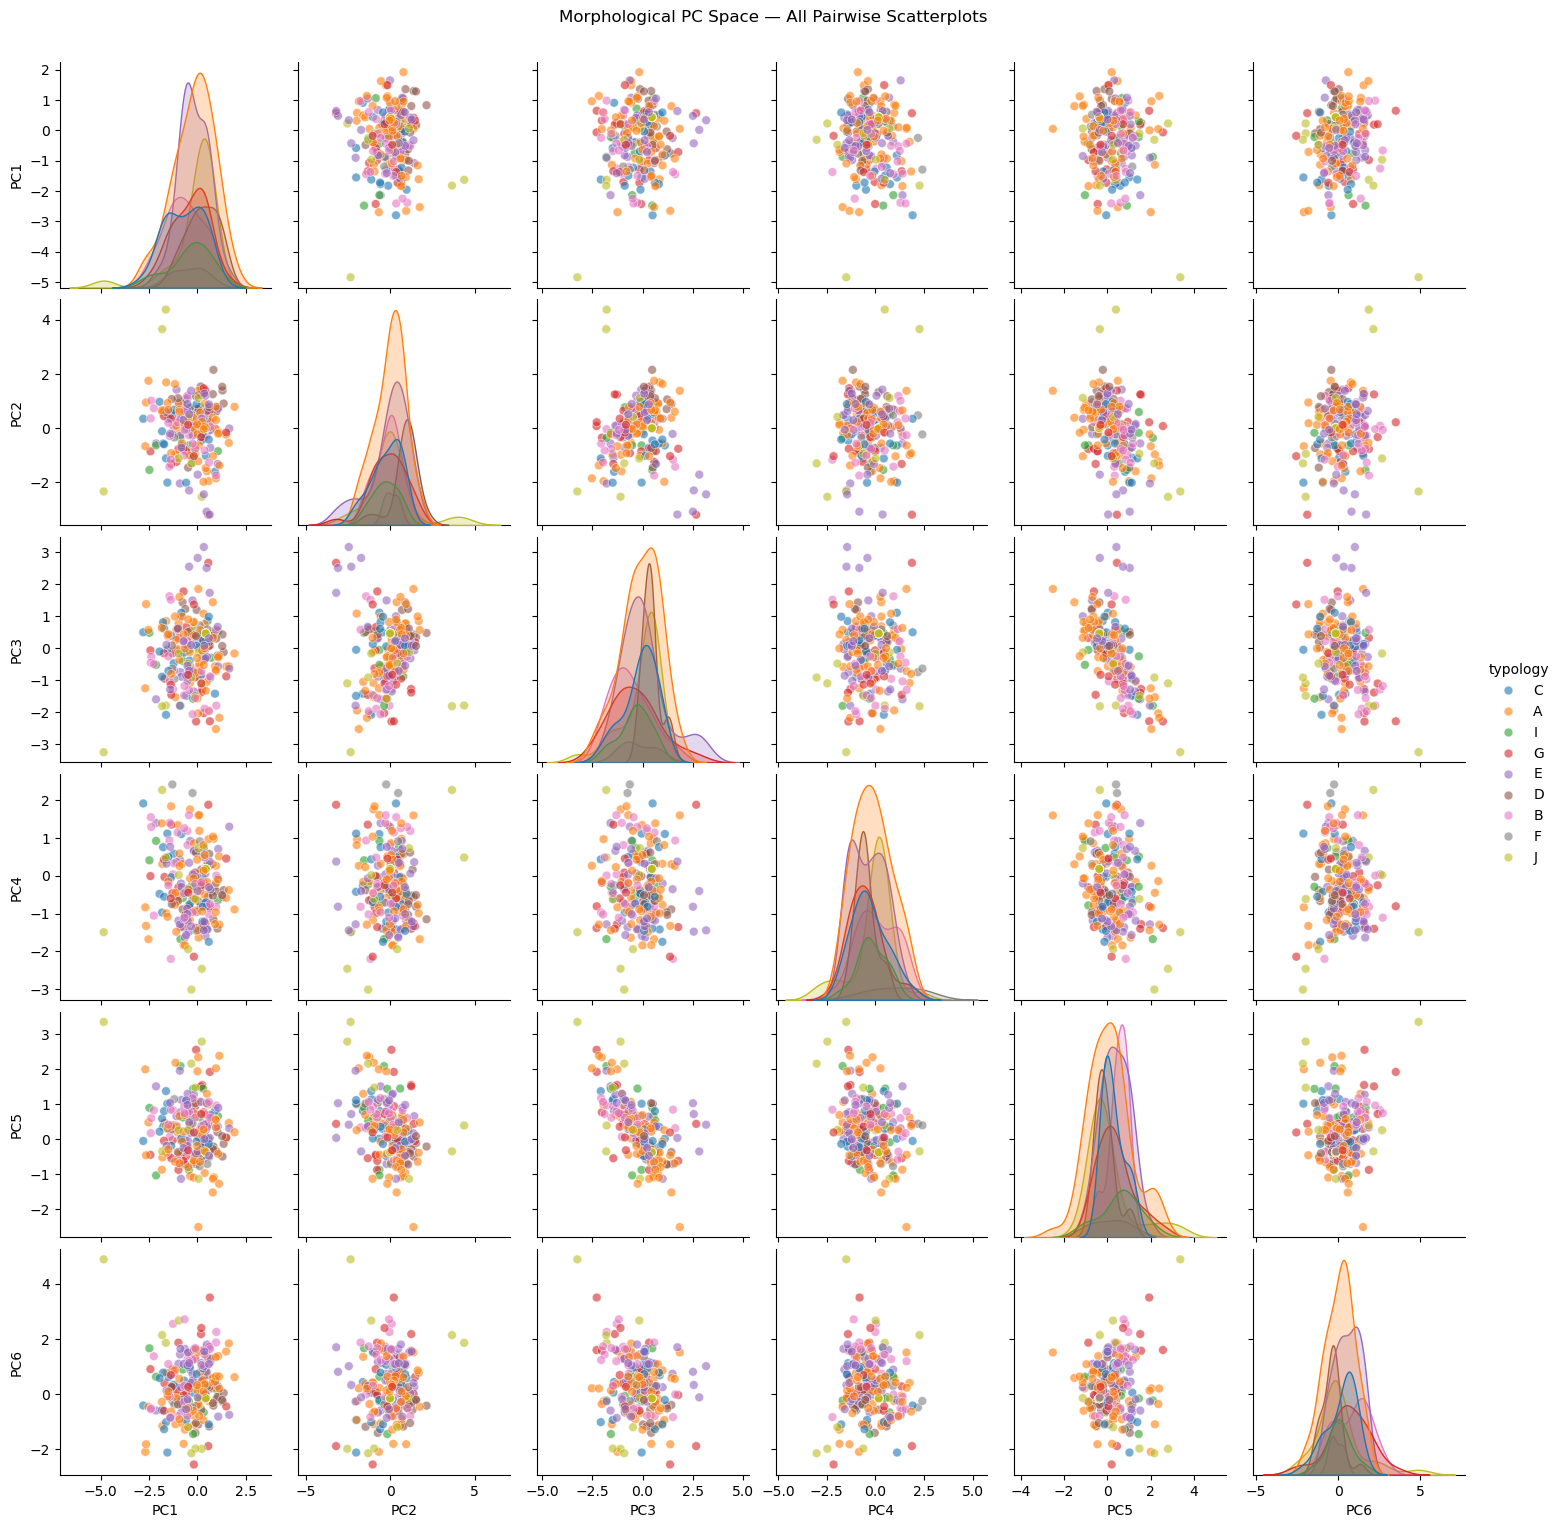

In [12]:
# all PC pairs in a grid
sns.pairplot(df, vars=morph_cols, hue="typology", 
             plot_kws={"alpha": 0.6, "s": 40})
plt.suptitle("Morphological PC Space — All Pairwise Scatterplots", y=1.02)
plt.show()

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


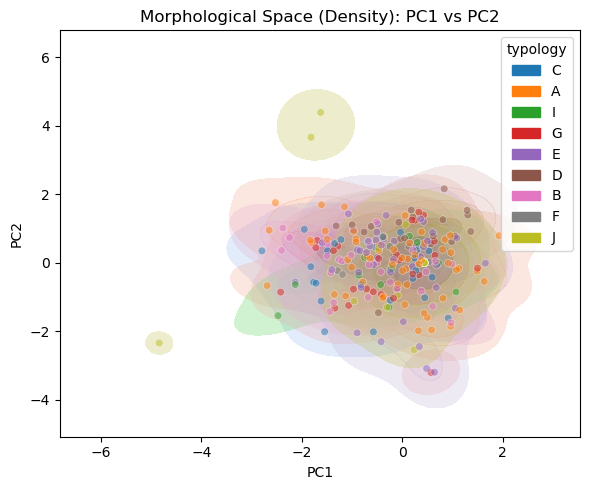

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


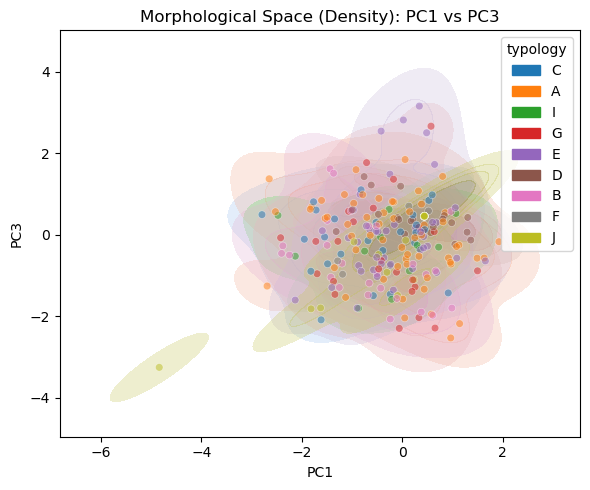

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


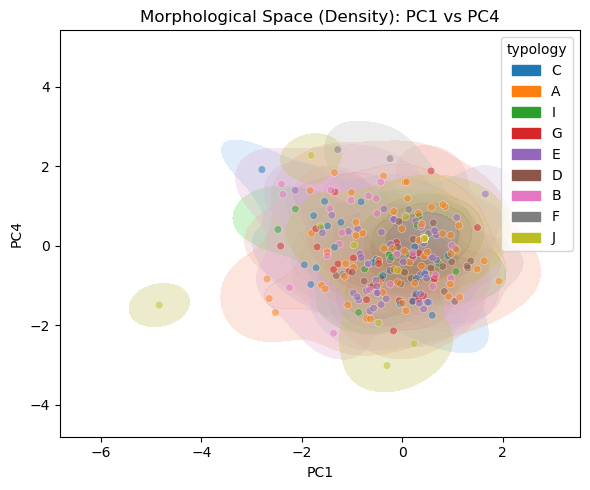

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


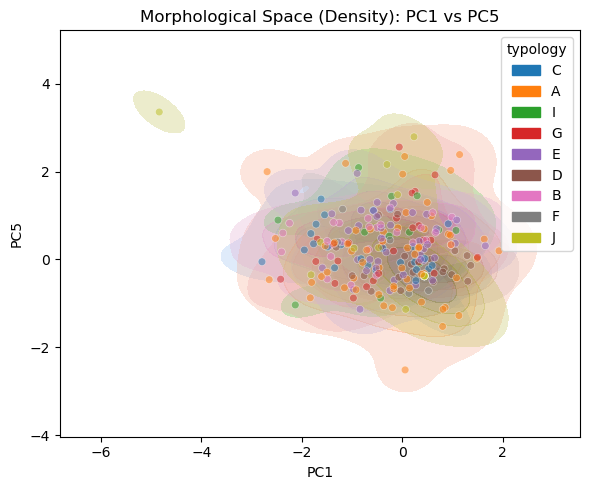

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


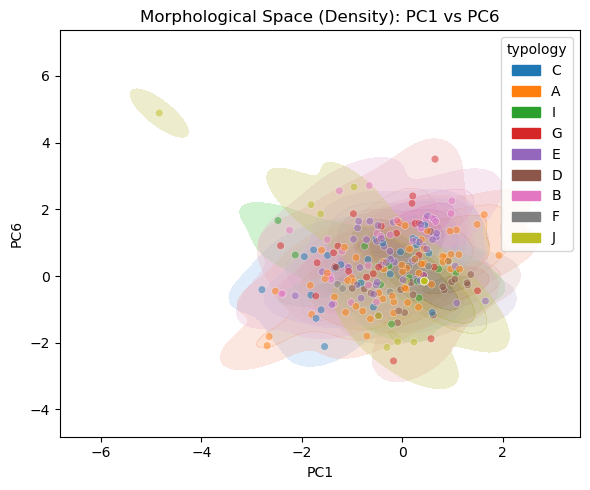

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


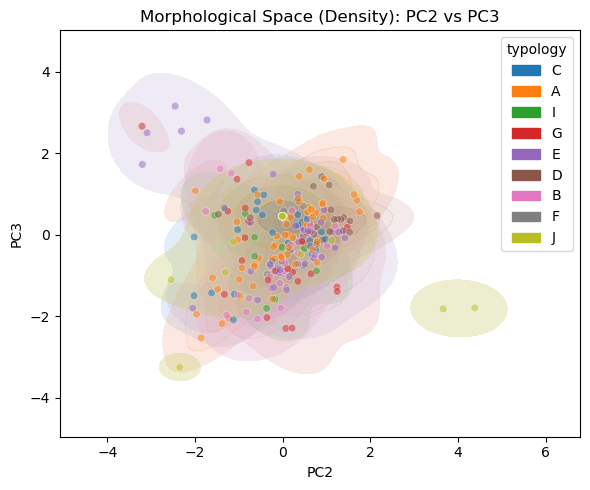

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


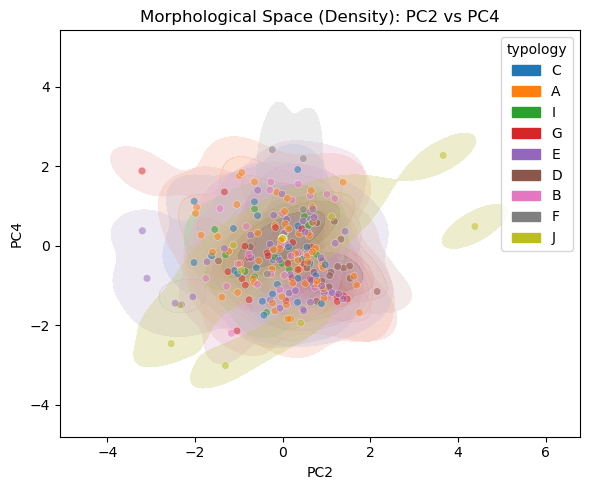

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


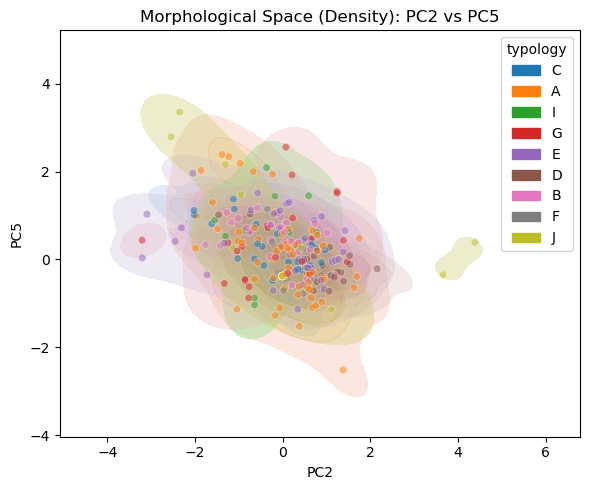

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


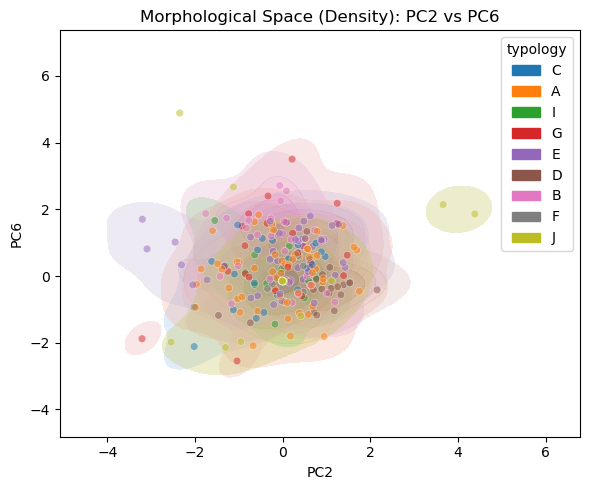

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


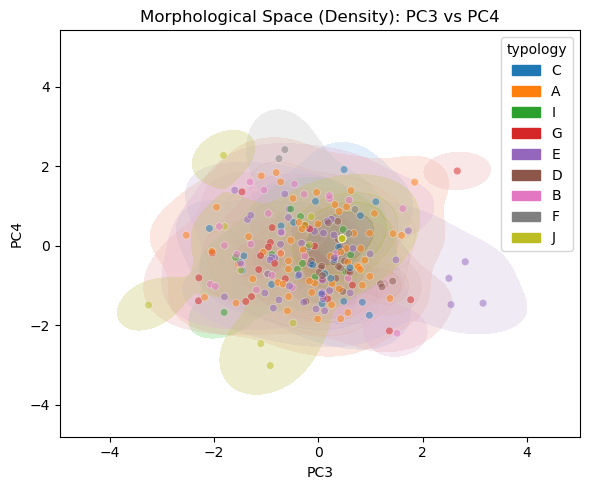

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


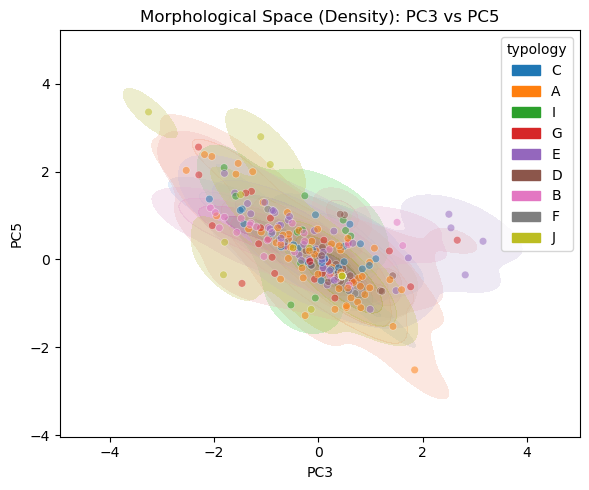

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


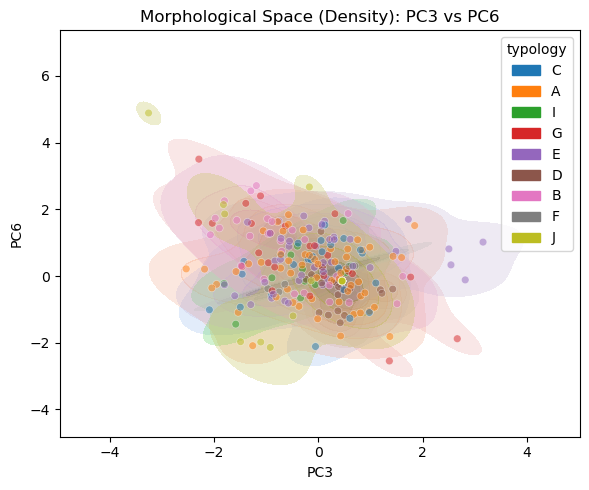

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


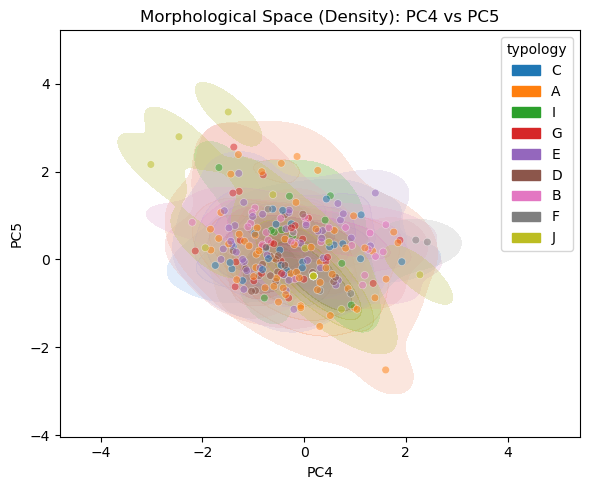

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


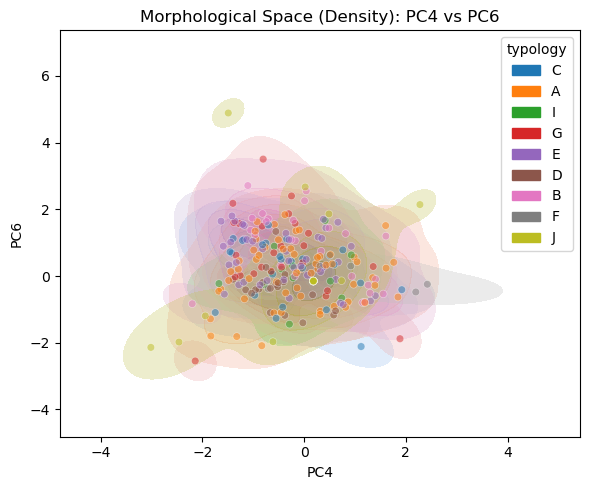

c:\Users\boiar\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


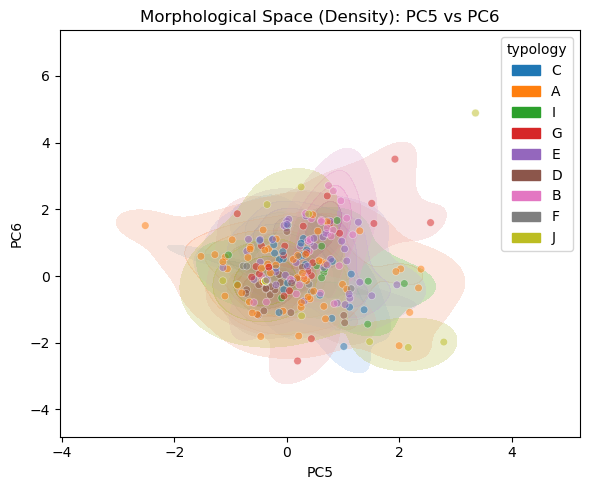

In [13]:
# highlight density based clusters, readable and interpretable plots for clusters
for i in range(len(morph_cols)):
    for j in range(i+1, len(morph_cols)):
        pcx, pcy = morph_cols[i], morph_cols[j]
        
        plt.figure(figsize=(6,5))
        sns.kdeplot(data=df, x=pcx, y=pcy, hue="typology",
                    levels=5, fill=True, alpha=0.3, linewidths=1)
        sns.scatterplot(data=df, x=pcx, y=pcy, hue="typology", alpha=0.5, s=30, legend=False)
        
        plt.title(f"Morphological Space (Density): {pcx} vs {pcy}")
        plt.tight_layout()
        plt.show()

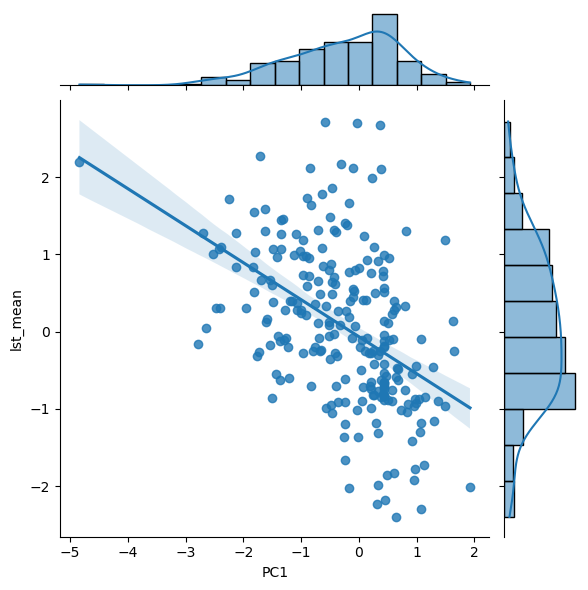

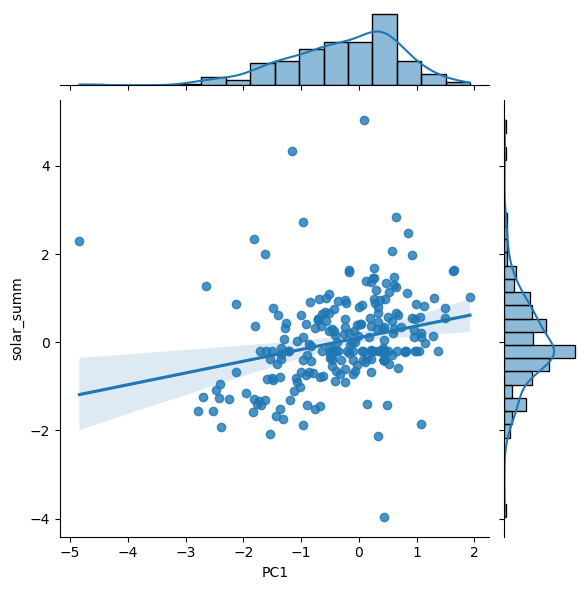

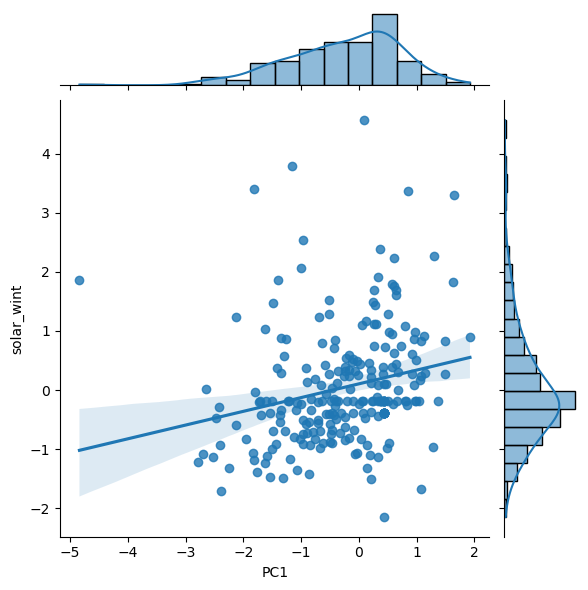

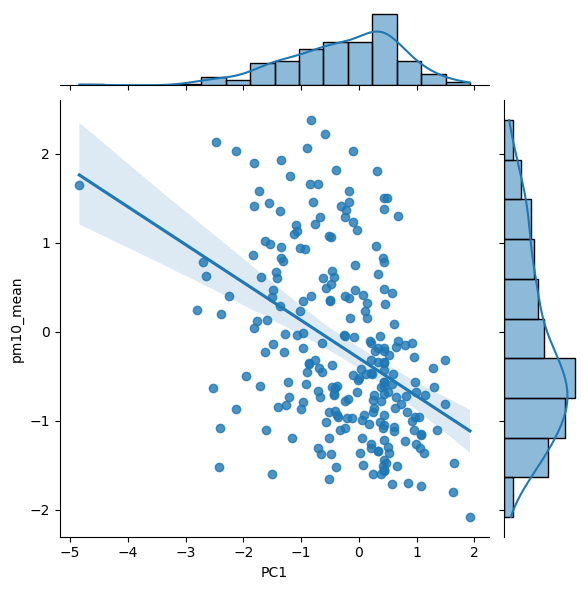

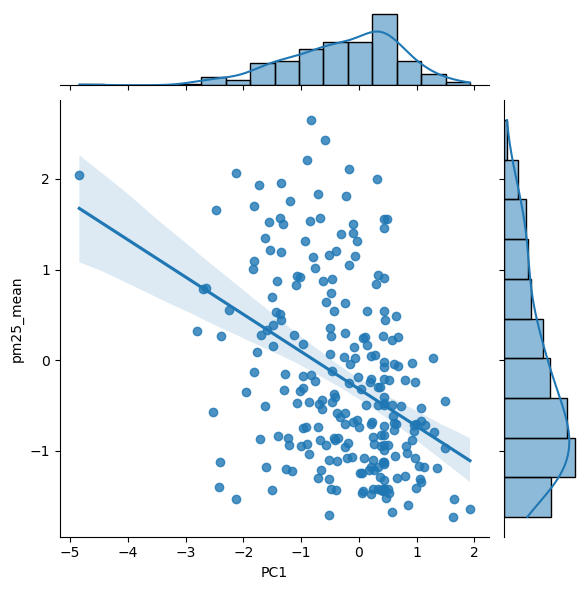

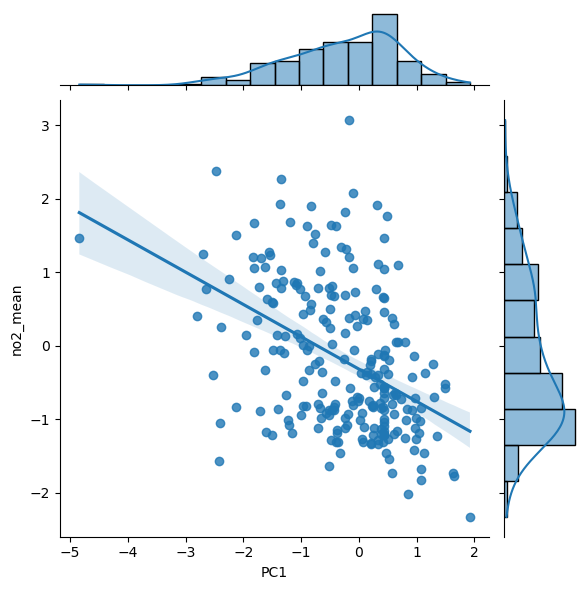

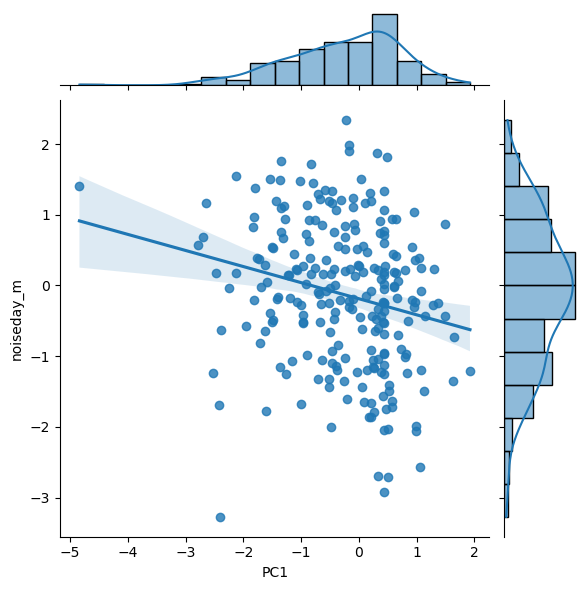

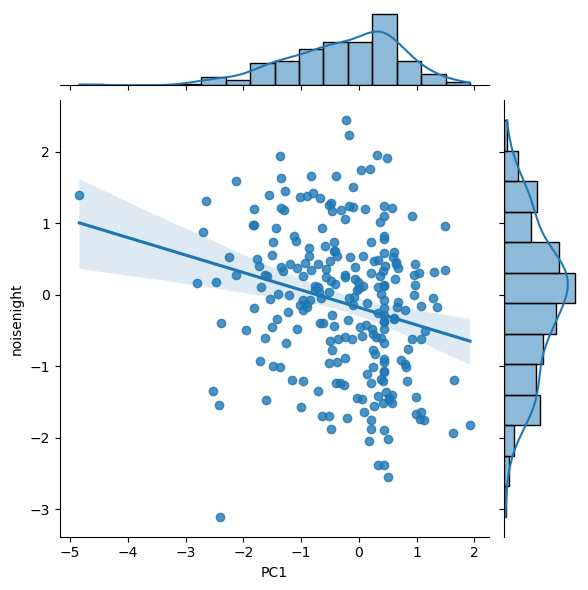

In [14]:
#linking morphology to main environmental drivers
for var in env_cols:
    sns.jointplot(data=df,x="PC1",y=var,kind="reg")

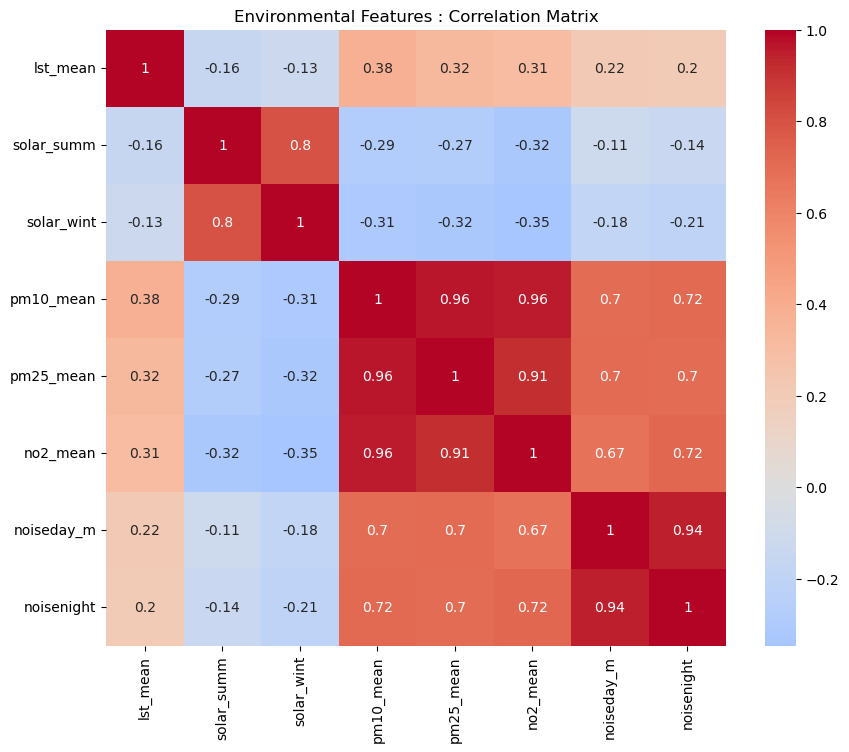

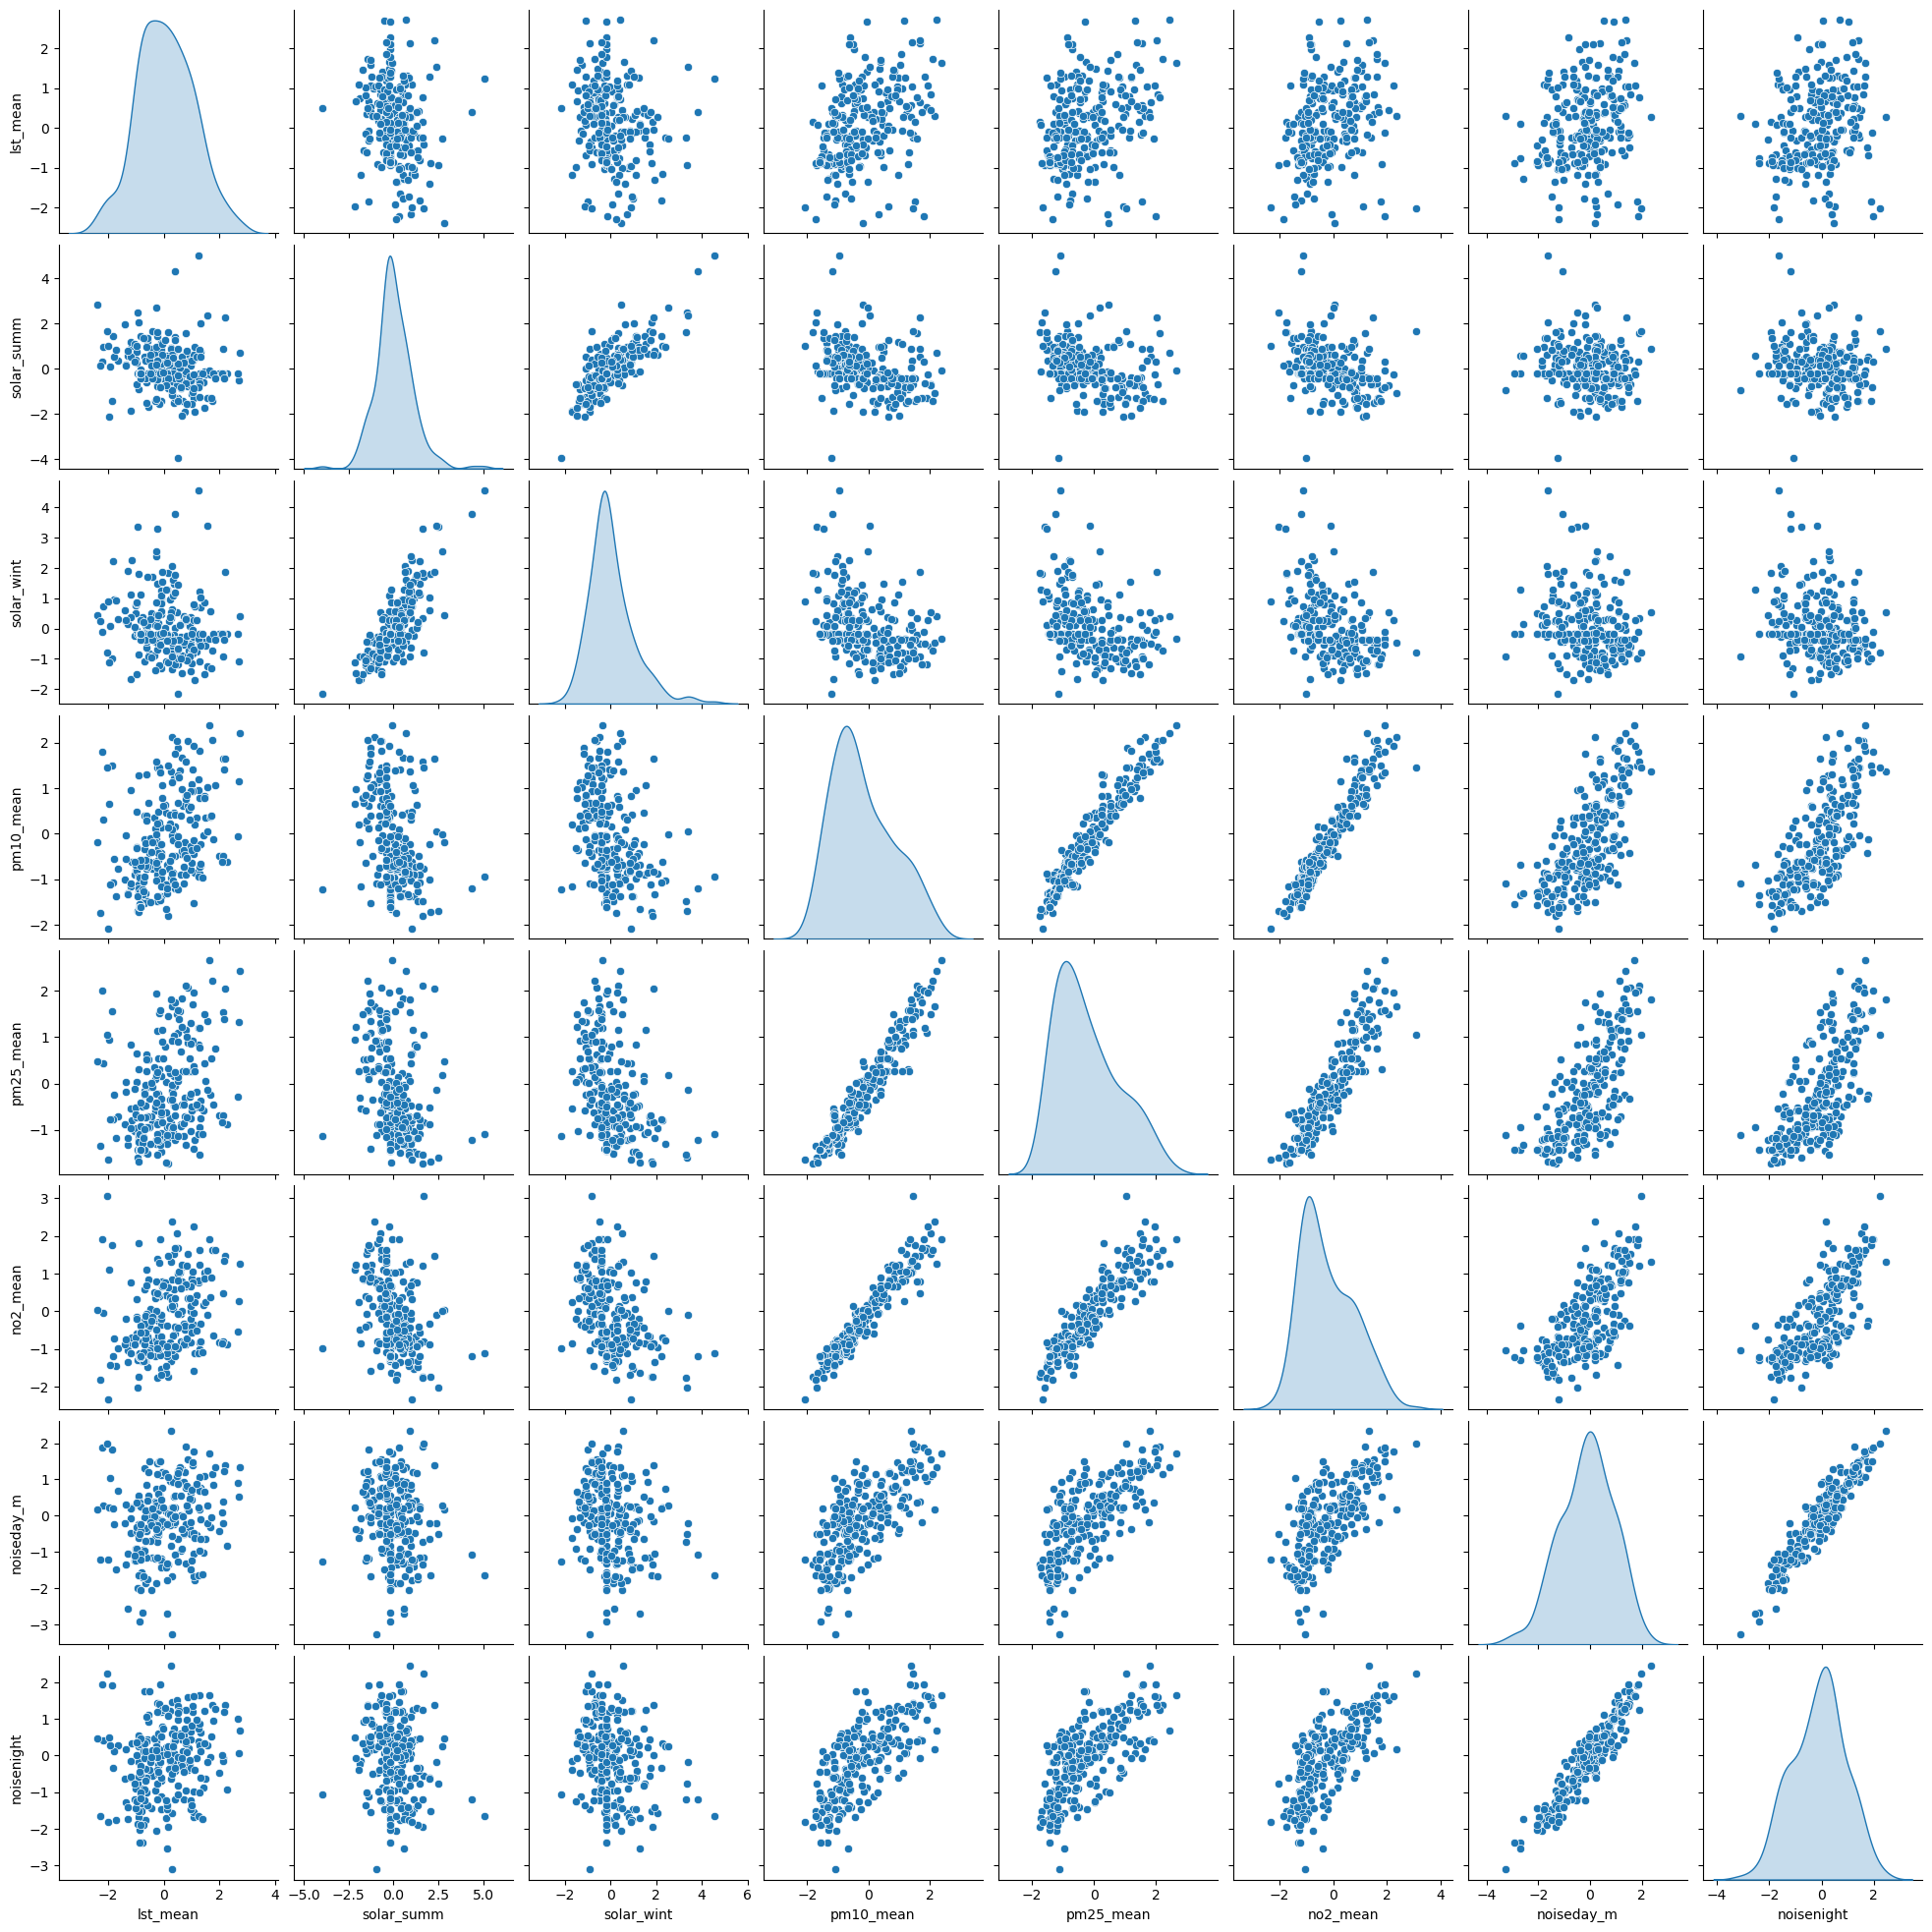

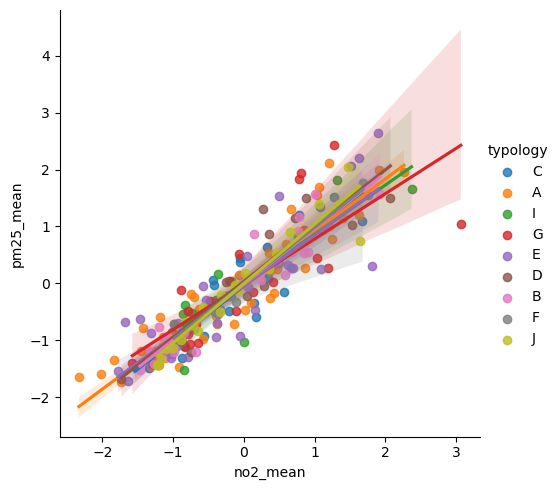

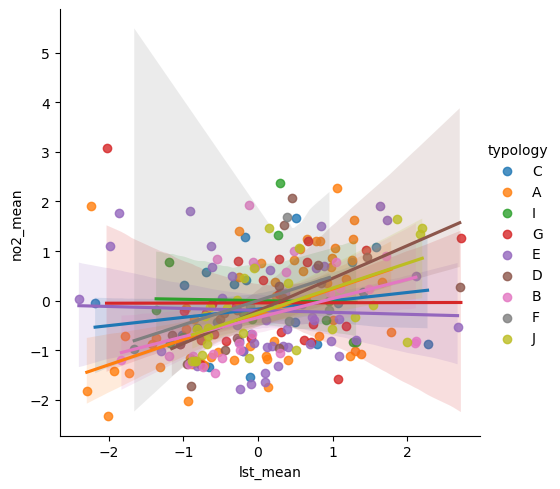

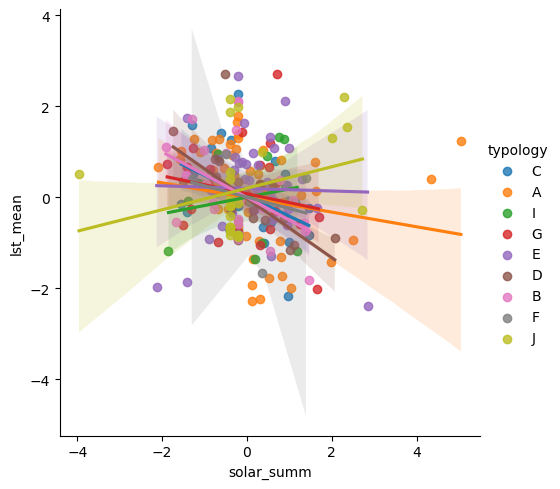

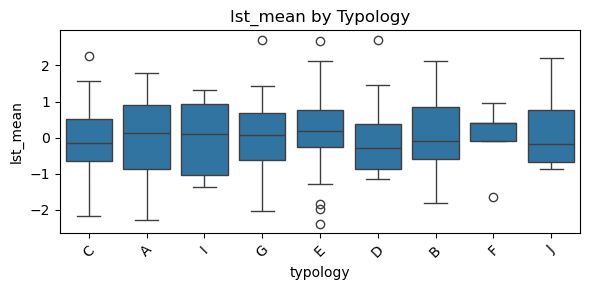

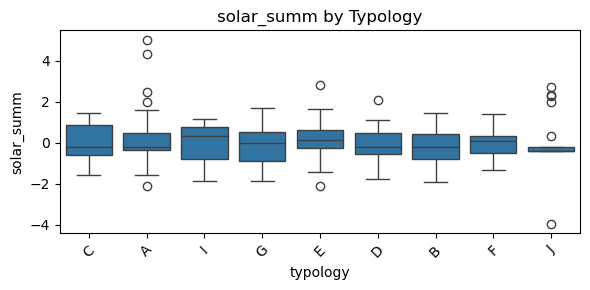

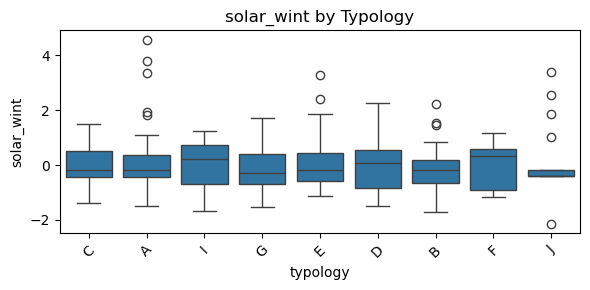

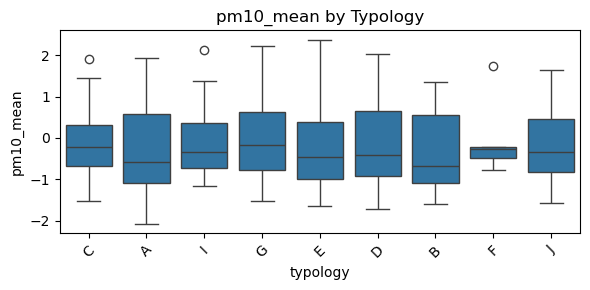

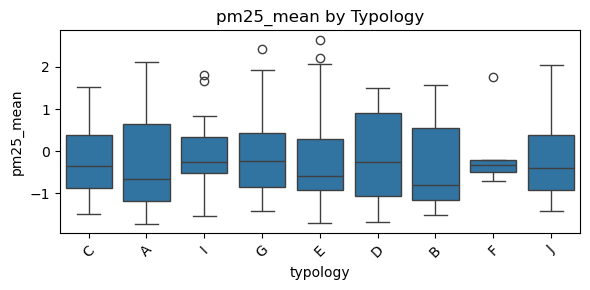

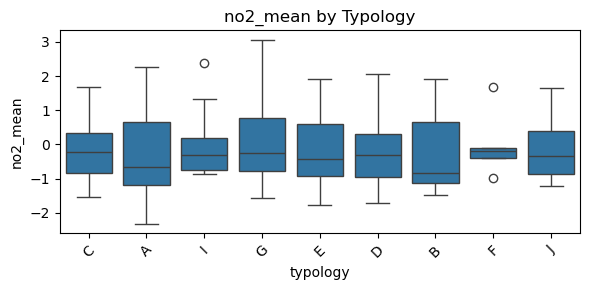

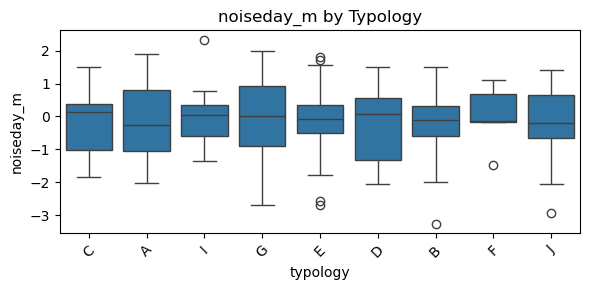

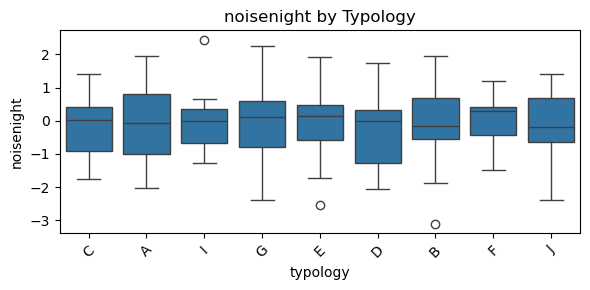

Explained variance: [0.57048213 0.20045122]


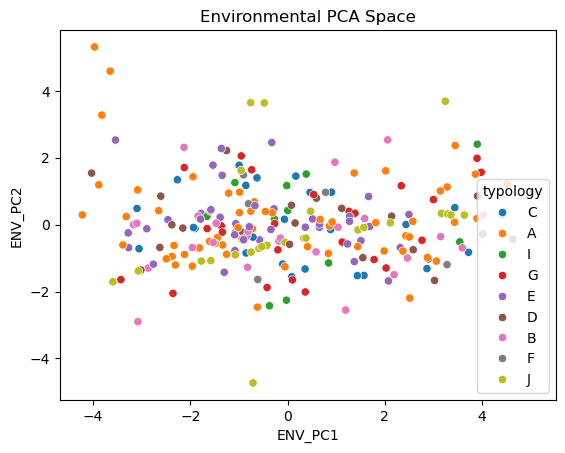

In [15]:
# reduced correlation analyses looking for colinearity among environmental quality data only
plt.figure(figsize=(10,8))
sns.heatmap(df[env_cols].corr(),annot=True,cmap="coolwarm",center=0)
plt.title("Environmental Features : Correlation Matrix")
plt.show()

#pairplot for compact visual overview to show all pairwise scatter plots, maybe catch nonlinear relations
sns.pairplot(df[env_cols],diag_kind="kde")

#feature to feature scatterplots with regression lines
# pollution cluster
sns.lmplot(data=df,x="no2_mean",y="pm25_mean",hue="typology",height=5)
#heat vs. pollution
sns.lmplot(data=df, x="lst_mean", y="no2_mean", hue="typology", height=5)
#solar radiation vs LST
sns.lmplot(data=df, x="solar_summ", y="lst_mean", hue="typology", height=5)

#typology level profiles for environmental data
for var in env_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df,x="typology",y=var)
    plt.xticks(rotation=45)
    plt.title(f"{var} by Typology")
    plt.tight_layout()
    plt.show()

#environmental PCA (optional, can remove if unnecessary)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#re-standardize environmental data (to understand)
X_env=StandardScaler().fit_transform(df[env_cols])
pca=PCA(n_components=2)
Z=pca.fit_transform(X_env)
df["ENV_PC1"]=Z[:,0]
df["ENV_PC2"]=Z[:,1]

print("Explained variance:", pca.explained_variance_ratio_)

sns.scatterplot(data=df, x="ENV_PC1", y="ENV_PC2", hue="typology")
plt.title("Environmental PCA Space")
plt.show()




